In [2]:
from dataset import tdsc
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dataset = tdsc.TDSC(path_to_dataset="data/tdsc")

In [4]:
v,m,l = dataset[4]
print(l)

B


Found 1 Leasones in depth #120
rect #0 :
 [[105 237]
 [179 237]
 [179 312]
 [105 312]]


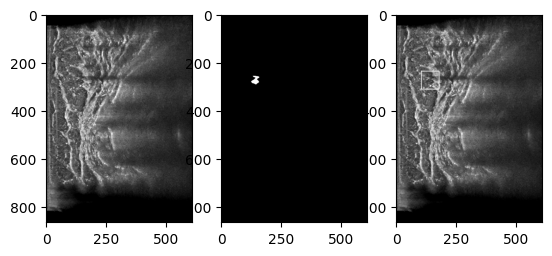

Found 1 Leasones in depth #121
rect #0 :
 [[ 69 234]
 [178 234]
 [178 310]
 [ 69 310]]


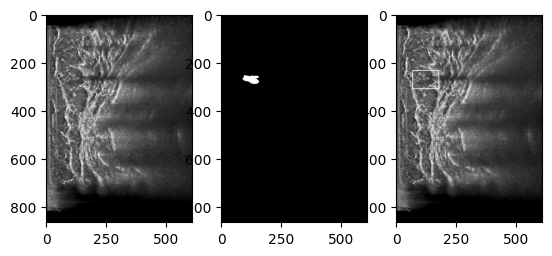

Found 1 Leasones in depth #122
rect #0 :
 [[ 66 236]
 [178 236]
 [178 320]
 [ 66 320]]


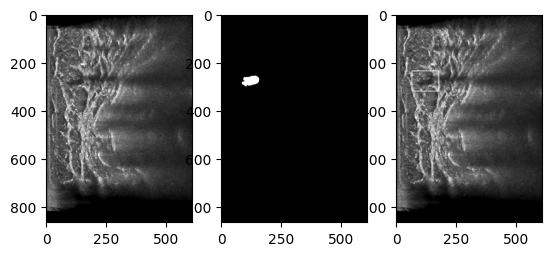

Found 1 Leasones in depth #123
rect #0 :
 [[ 59 232]
 [180 232]
 [180 315]
 [ 59 315]]


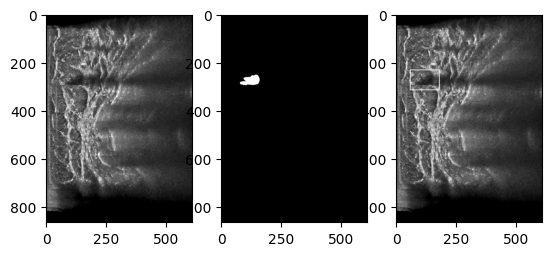

Found 1 Leasones in depth #124
rect #0 :
 [[ 56 226]
 [178 226]
 [178 316]
 [ 56 316]]


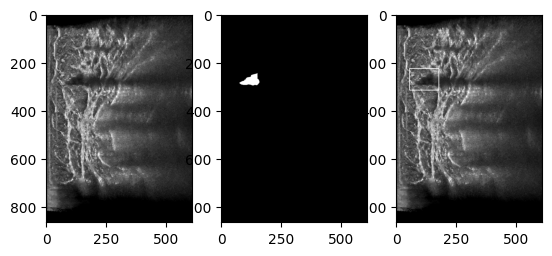

Found 1 Leasones in depth #125
rect #0 :
 [[ 54 242]
 [181 242]
 [181 323]
 [ 54 323]]


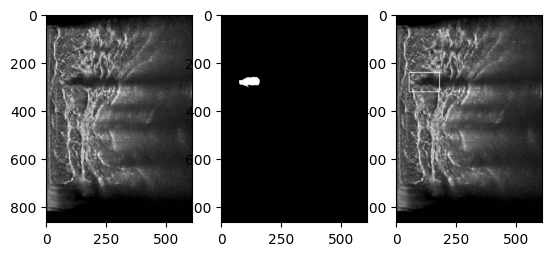

Found 1 Leasones in depth #126
rect #0 :
 [[ 53 228]
 [177 228]
 [177 319]
 [ 53 319]]


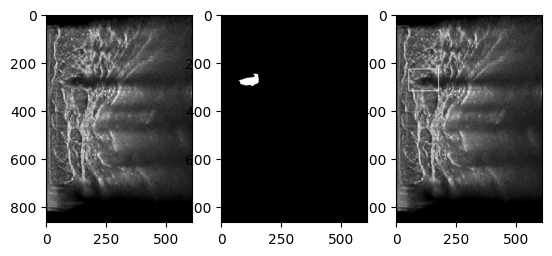

Found 1 Leasones in depth #127
rect #0 :
 [[ 55 244]
 [184 244]
 [184 319]
 [ 55 319]]


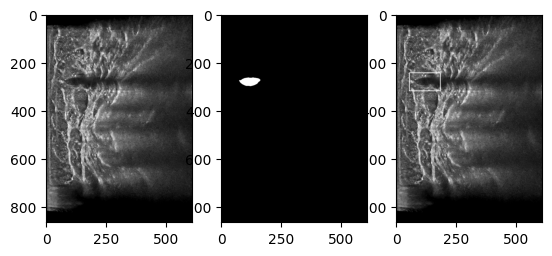

Found 1 Leasones in depth #128
rect #0 :
 [[ 53 243]
 [163 243]
 [163 323]
 [ 53 323]]


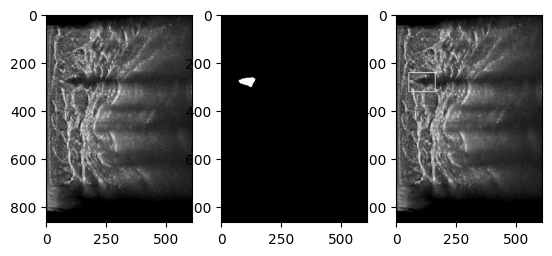

Found 1 Leasones in depth #129
rect #0 :
 [[ 56 245]
 [160 245]
 [160 312]
 [ 56 312]]


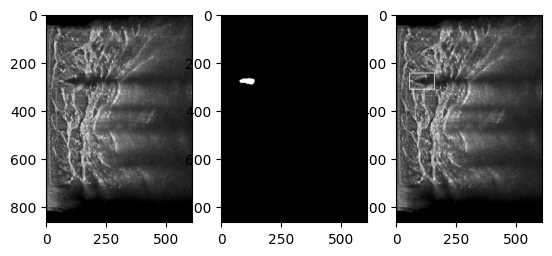

Found 1 Leasones in depth #130
rect #0 :
 [[ 57 250]
 [156 250]
 [156 307]
 [ 57 307]]


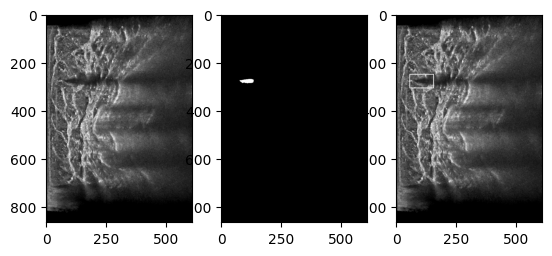

Found 1 Leasones in depth #131
rect #0 :
 [[ 55 247]
 [156 247]
 [156 311]
 [ 55 311]]


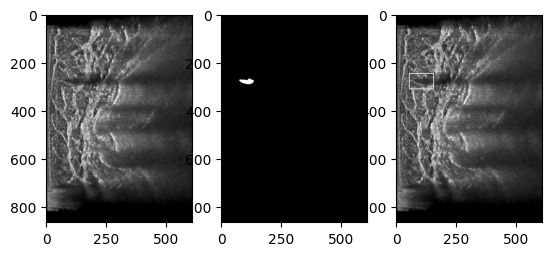

Found 1 Leasones in depth #132
rect #0 :
 [[ 77 250]
 [150 250]
 [150 305]
 [ 77 305]]


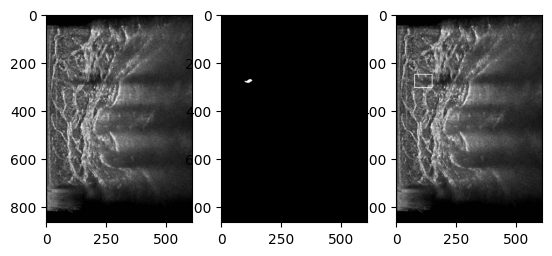

In [13]:
for d in range(m.shape[2]):
    
    mask = np.array(m[:,:,d])
    img = np.array(v[:,:,d])
    element = cv2.getStructuringElement(cv2.MORPH_RECT, (41, 41), (20, 20))
    dilated_mask = cv2.dilate(mask, element)
    contours,_ = cv2.findContours(dilated_mask, 1, 1) # not copying here will throw an error
    if len(contours) != 0 :
        print(f"Found {len(contours)} Leasones in depth #{d}")
        comb = img.copy() + (mask.copy() * 255)
        for idx, cuntur in enumerate(contours):
            rect = cv2.minAreaRect(cuntur) # basically you can feed this rect into your classifier
            (x,y),(w,h), a = rect # a - angle
            if (w < 10 and h < 10) :
                continue
            box = cv2.boxPoints(rect)
            box = np.int32(box) #turn into ints
            print(f"rect #{idx} :\n {box}")
            comb = cv2.drawContours(comb,[box],0,(255,255,255),2)
        plt.subplot(1,3,1)
        plt.imshow(img, cmap = 'gray')
        plt.subplot(1,3,2)
        plt.imshow(mask, cmap = 'gray')
        plt.subplot(1,3,3)
        plt.imshow(comb, cmap='gray')
        plt.show()

In [ ]:
v,m,l = dataset[0]
print(l)

In [ ]:
for d in range(m.shape[2]):
    
    mask = np.array(m[:,:,d])
    img = np.array(v[:,:,d])
    element = cv2.getStructuringElement(cv2.MORPH_RECT, (41, 41), (20, 20))
    dilated_mask = cv2.dilate(mask, element)
    contours,_ = cv2.findContours(dilated_mask, 1, 1) # not copying here will throw an error
    if len(contours) != 0 :
        print(f"Found {len(contours)} Leasones in depth #{d}")
        comb = img.copy() + (mask.copy() * 255)
        for idx, cuntur in enumerate(contours):
            rect = cv2.minAreaRect(cuntur) # basically you can feed this rect into your classifier
            (x,y),(w,h), a = rect # a - angle
            if (w < 10 and h < 10) :
                continue
            box = cv2.boxPoints(rect)
            box = np.int32(box) #turn into ints
            print(f"rect #{idx} :\n {box}")
            comb = cv2.drawContours(comb,[box],0,(255,255,255),2)
        plt.subplot(1,3,1)
        plt.imshow(img, cmap = 'gray')
        plt.subplot(1,3,2)
        plt.imshow(mask, cmap = 'gray')
        plt.subplot(1,3,3)
        plt.imshow(comb, cmap='gray')
        plt.show()

In [2]:
import numpy as np
import cv2

# Generate a 3D star shape
size = (100, 100, 100)
center = (size[0] // 2, size[1] // 2, size[2] // 2)
radius = min(center) - 5

# Create a blank volume
volume = np.zeros(size, dtype=np.uint8)

# Set voxel values for the star shape
for z in range(size[2]):
    for y in range(size[1]):
        for x in range(size[0]):
            distance = np.sqrt((x - center[0]) ** 2 + (y - center[1]) ** 2 + (z - center[2]) ** 2)
            if 0.4 * radius <= distance <= 0.6 * radius:
                volume[z, y, x] = 255

# Display slices of the volume using OpenCV
slice_index = size[2] // 2  # Display the middle slice
slice_image = volume[:, :, slice_index]
cv2.imshow("Slice", slice_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [3]:
unetimport numpy as np
import cv2

# Generate a 2D star shape
size = (100, 100)
center = (size[0] // 2, size[1] // 2)
radius = min(center) - 5

# Create a blank image
image = np.zeros(size, dtype=np.uint8)

# Set pixel values for the star shape
for y in range(size[1]):
    for x in range(size[0]):
        distance = np.sqrt((x - center[0]) ** 2 + (y - center[1]) ** 2)
        if (
            (0.2 * radius <= distance <= 0.25 * radius) or
            (0.45 * radius <= distance <= 0.5 * radius) or
            (0.7 * radius <= distance <= 0.75 * radius)
        ):
            image[y, x] = 255

# Display the image using OpenCV
cv2.imshow("Star", image)
cv2.waitKey(0)
cv2.destroyAllWindows()